In [1]:
import pandas as pd
import numpy as np
import pingouin
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Add your code snippets here
sample_dem_data = pd.read_feather(r"C:\Users\alber\Documents\Online Course\Coding Notez\dem_votes_potus_12_16.feather")
sample_dem_data

,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352
2,Alabama,Clay,26.673672,18.674517
3,Alabama,Cullman,14.661752,10.028252
4,Alabama,Escambia,36.915731,31.020546
...,...,...,...,...
495,Wyoming,Uinta,19.065464,14.191263
496,Wyoming,Washakie,20.131846,13.948610
497,Alaska,District 3,33.514582,16.301064
498,Alaska,District 18,61.284271,52.810051


In [14]:
pip install pyarrow

     ---------------------------------------- 21.5/21.5 MB 7.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pd.show_versions()

C:\Users\alber\anaconda3\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit           : ca60aab7340d9989d9428e11a51467658190bb6b
python           : 3.9.13.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.22621
machine          : AMD64
processor        : AMD64 Family 25 Model 80 Stepping 0, AuthenticAMD
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_Indonesia.1252

pandas           : 1.4.4
numpy            : 1.21.5
pytz             : 2022.1
dateutil         : 2.8.2
setuptools       : 63.4.1
pip              : 22.2.2
Cython           : 0.29.32
pytest           : 7.1.2
hypothesis       : None
sphinx           : 5.0.2
blosc            : None
feather          : None
xlsxwriter       : 3.0.3
lxml.etree       : 4.9.1
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.11.3
IPython          : 7.31.1
pandas_datareader: None
bs4              : 4.11.1
bottleneck       : 1.3.5
bro

In [4]:
sample_dem_data['diff']=sample_dem_data['dem_percent_12']-sample_dem_data['dem_percent_16']

# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], 
                              y=0, 
                              alternative="two-sided")

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
                              y=sample_dem_data['dem_percent_16'], 
                              alternative="two-sided", paired=False)



                              
# Print the paired test results
print(paired_test_results)
print(test_results)
#print(paired_test_results + test_results)

               T  dof alternative         p-val        CI95%   cohen-d  \
T-test  7.181565  998   two-sided  1.345737e-12  [4.96, 8.7]  0.454202   

             BF10  power  
T-test  4.308e+09    1.0  
                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  


## PROPORTIONAL Z-TEST

In [9]:
# Add your code snippets here
stack_overflow = pd.read_feather(r"C:\Users\alber\Documents\Online Course\Coding Notez\stack_overflow.feather")
stack_overflow

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,62812.0,I am a developer by profession,Yes,40.0,10.0,child,Yearly,145000.0,145000.0,United States,...,Too long,No,"Computer science, computer engineering, or sof...",Flask;jQuery,Angular;Angular.js;Flask;jQuery;React.js,Somewhat less welcome now than last year,50.0,30.0,20.0,At least 30
2257,62835.0,I am a developer by profession,Yes,23.0,9.0,child,Monthly,180000.0,33972.0,Russian Federation,...,Too short,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET Core;Flask,Just as welcome now as I felt last year,60.0,8.0,3.0,Under 30
2258,62837.0,I am a developer by profession,Yes,27.0,8.0,child,Monthly,7500.0,97284.0,Germany,...,Appropriate in length,No,Mathematics or statistics,None,None,Just as welcome now as I felt last year,42.0,12.0,2.0,Under 30
2259,62867.0,"I am not primarily a developer, but I write co...",Yes,33.0,13.0,child,Monthly,6000.0,72000.0,Panama,...,Too long,No,"Another engineering discipline (such as civil,...",None,Django;React.js,A lot less welcome now than last year,45.0,15.0,2.0,At least 30


In [10]:
stack_overflow['age_cat'].value_counts(normalize=True)

Under 30       0.535604
At least 30    0.464396
Name: age_cat, dtype: float64

In [11]:
p_hat = (stack_overflow['age_cat']=='Under 30').mean()
p_hat

0.5356037151702786

In [23]:
p_0 = 0.5
n = len(stack_overflow)

In [25]:
Numerator = p_hat - p_0
Denominator = np.sqrt((p_0*(1-p_0))/n)
z = Numerator/Denominator
z

3.385911440783663

In [28]:
df = pd.DataFrame(np.random.rand(100,1), index=pd.date_range('1-1-2018', periods=100))
df

,0
2018-01-01,0.206766
2018-01-02,0.056106
2018-01-03,0.932553
2018-01-04,0.224450
2018-01-05,0.233371
...,...
2018-04-06,0.288411
2018-04-07,0.725386
2018-04-08,0.417520
2018-04-09,0.930216


                   0         1
2018-01-01  0.264097  0.373640
2018-01-02  0.976013  0.826386
2018-01-03  0.889664  0.200587
2018-01-04  0.571490  0.605992
2018-01-05  0.876786  0.714817
...              ...       ...
2018-04-06  0.955211  0.165684
2018-04-07  0.292231  0.856285
2018-04-08  0.437817  0.808376
2018-04-09  0.211896  0.700667
2018-04-10  0.534855  0.601004

[100 rows x 2 columns]


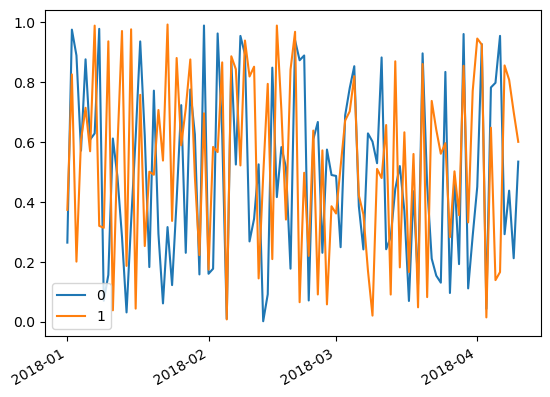

In [56]:
df = pd.DataFrame(np.random.rand(100,2), index=pd.date_range('1-1-2018', periods=100))
ax = df.plot(x_compat=True)
ax.xaxis.set_major_locator(mdates.MonthLocator())
print(df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

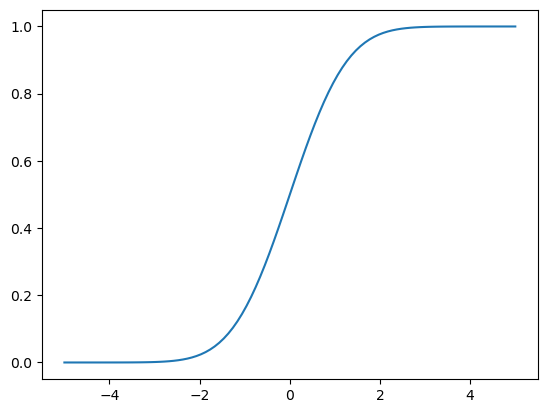

In [91]:
x = np.linspace(-5, 5, 100)
y = norm.cdf(x)
plt.plot(x, y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

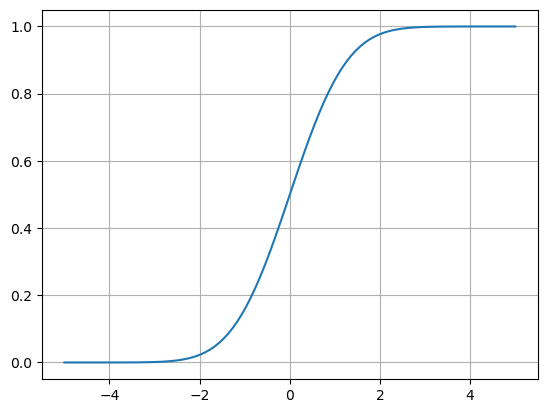

In [92]:
x = np.linspace(-5, 5, 100)
y = norm.cdf(x)
fig, ax = plt.subplots()
ax.plot(x,y, label='CDF Curve')
ax.grid(True)
plt.show

 ## Proportional Two Sample Z-Tests

In [6]:
stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


In [18]:
p_hat = stack_overflow.groupby('age_cat')['hobbyist'].value_counts(normalize=True)
p_hat

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: hobbyist, dtype: float64

In [17]:
p_hat['At least 30']['Yes']

0.7733333333333333

In [16]:
n = stack_overflow.groupby('age_cat')['main_branch'].count()
n

age_cat
At least 30    1050
Under 30       1211
Name: main_branch, dtype: int64

In [19]:
p_hat_under_30 = p_hat[('Under 30', 'Yes')]
p_hat_at_least_30 = p_hat[('At least 30', 'Yes')]
n_under_30 = n['Under 30']
n_at_least_30 = n['At least 30']
p_hat_weighted = (n_under_30*p_hat_under_30 + n_at_least_30*p_hat_at_least_30)/(n_under_30+n_at_least_30)

In [131]:
p_hat_weighted

0.810703228659885

In [20]:
SE = np.sqrt(p_hat_weighted*(1-p_hat_weighted)/n_under_30+p_hat_weighted*(1-p_hat_weighted)/n_at_least_30)
SE

0.016519089824430542

In [21]:
z_score = (p_hat_under_30 - p_hat_at_least_30)/SE
z_score
#Z SCORE DISINI HASILNYA BAKAL SAMA AJA MAU LESS GREATER ATAU DOUBLE, KARENA GRAFIKNYA MEMANG SIMETRIS.
# GA KAYAK DI UJI NON PARAMETRIC.

4.223691463320559

In [22]:
n_hobbyist = np.array([812, 1021])
n_rows = np.array([812+238, 1021+190])  #kalo di tambah kurung 1 lagi, dia jadi bikin columns, kalo sekarang cuman row

In [23]:
n_rows.shape

(2,)

In [24]:
n_rows

array([1050, 1211])

In [25]:
n_hobbyist

array([ 812, 1021])

In [26]:
n_hobbyist.shape

(2,)

In [150]:
from statsmodels.stats.proportion import proportions_ztest

In [158]:
z_score2, p_value2 = proportions_ztest(count=n_hobbyist, nobs=n_rows, alternative='larger')
z_score2

-4.223691463320559

In [159]:
z_score, p_value = proportions_ztest(count=n_hobbyist, nobs=n_rows, alternative='two-sided')

In [160]:
z_score

-4.223691463320559

In [177]:
p_value

2.403330142685068e-05

## CHI-SQUARE INDEPENDENT TESTS

In [27]:
age_by_hobbyist = stack_overflow.groupby('age_cat')['hobbyist'].value_counts()
age_by_hobbyist
#age sama hobbyist ini bukan kolom, bentuk data ini kayak dictionary atau kolom dengan 1 value gitu.

age_cat      hobbyist
At least 30  Yes          812
             No           238
Under 30     Yes         1021
             No           190
Name: hobbyist, dtype: int64

In [28]:
age_by_hobbyist['At least 30']['Yes']

812

In [29]:
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='hobbyist', y='age_cat', correction=False)

In [198]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,17.839570,1.0,0.000024,0.088826,0.988205
1,cressie-read,0.666667,17.818114,1.0,0.000024,0.088773,0.988126
2,log-likelihood,0.000000,17.802653,1.0,0.000025,0.088734,0.988069
3,freeman-tukey,-0.500000,17.815060,1.0,0.000024,0.088765,0.988115
4,mod-log-likelihood,-1.000000,17.848099,1.0,0.000024,0.088848,0.988236
5,neyman,-2.000000,17.976656,1.0,0.000022,0.089167,0.988694


In [30]:
expected, observed, stats2 = pingouin.chi2_independence(data=stack_overflow, x='age_cat', y='hobbyist', correction=True)

In [200]:
stats2

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,17.387820,1.0,0.000030,0.087694,0.986444
1,cressie-read,0.666667,17.366950,1.0,0.000031,0.087642,0.986357
2,log-likelihood,0.000000,17.351288,1.0,0.000031,0.087602,0.986291
3,freeman-tukey,-0.500000,17.362338,1.0,0.000031,0.087630,0.986338
4,mod-log-likelihood,-1.000000,17.392980,1.0,0.000030,0.087707,0.986466
5,neyman,-2.000000,17.513563,1.0,0.000029,0.088011,0.986958


In [31]:
age_by_sat = stack_overflow.groupby('age_cat')['job_sat'].value_counts()
age_by_sat

age_cat                           
At least 30  Very satisfied           429
             Slightly satisfied       296
             Slightly dissatisfied    160
             Neither                   87
             Very dissatisfied         78
Under 30     Very satisfied           450
             Slightly satisfied       384
             Slightly dissatisfied    182
             Neither                  114
             Very dissatisfied         81
Name: job_sat, dtype: int64

In [203]:
import seaborn as sns

In [229]:
sns.barplot(x = 'age_cat', y=age_by_sat.values, hue='job_sat', data=age_by_sat)

ValueError: Could not interpret input 'age_cat'

In [230]:
sns.barplot(x = age_by_sat.index, y=age_by_sat.values)
age_by_sat.dropna()

NotImplementedError: isna is not defined for MultiIndex

In [8]:
age_by_sat[1]

NameError: name 'age_by_sat' is not defined

In [212]:
age_by_sat.info()

<class 'pandas.core.series.Series'>
MultiIndex: 10 entries, ('At least 30', 'Very satisfied') to ('Under 30', 'Very dissatisfied')
Series name: job_sat
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 629.0+ bytes


<AxesSubplot:xlabel='age_cat,None'>

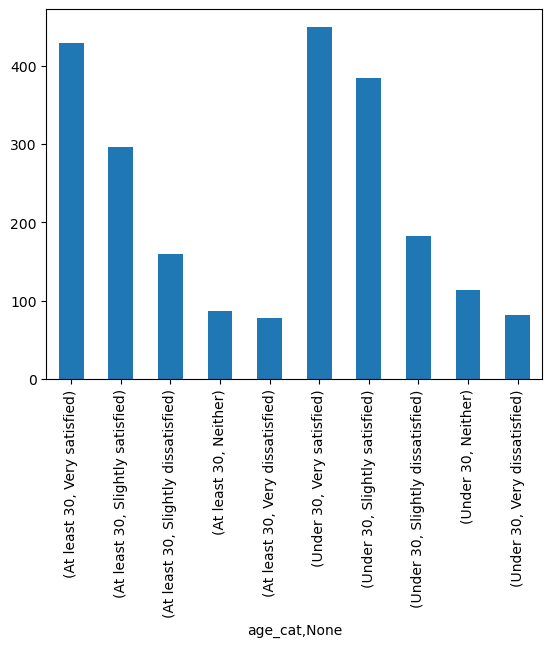

In [213]:
age_by_sat.plot.bar()

In [214]:
age_by_sat.index

MultiIndex([('At least 30',        'Very satisfied'),
            ('At least 30',    'Slightly satisfied'),
            ('At least 30', 'Slightly dissatisfied'),
            ('At least 30',               'Neither'),
            ('At least 30',     'Very dissatisfied'),
            (   'Under 30',        'Very satisfied'),
            (   'Under 30',    'Slightly satisfied'),
            (   'Under 30', 'Slightly dissatisfied'),
            (   'Under 30',               'Neither'),
            (   'Under 30',     'Very dissatisfied')],
           names=['age_cat', None])

In [217]:
age_by_sat.values

array([429, 296, 160,  87,  78, 450, 384, 182, 114,  81], dtype=int64)

In [32]:
a = age_by_sat.reset_index()
a

,age_cat,level_1,job_sat
0,At least 30,Very satisfied,429
1,At least 30,Slightly satisfied,296
2,At least 30,Slightly dissatisfied,160
3,At least 30,Neither,87
4,At least 30,Very dissatisfied,78
5,Under 30,Very satisfied,450
6,Under 30,Slightly satisfied,384
7,Under 30,Slightly dissatisfied,182
8,Under 30,Neither,114
9,Under 30,Very dissatisfied,81


<AxesSubplot:xlabel='age_cat', ylabel='job_sat'>

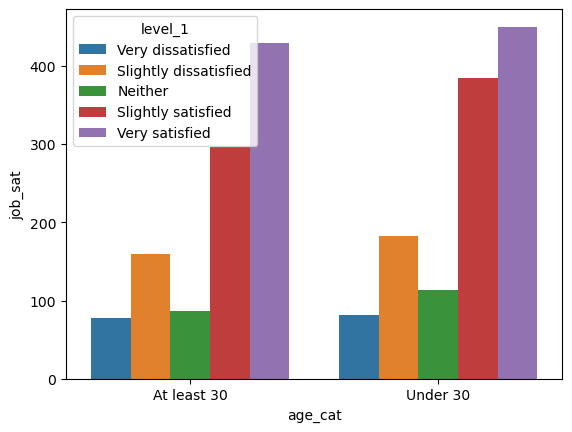

In [231]:
sns.barplot(x='age_cat', y='job_sat', hue='level_1', data=a)

In [223]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   age_cat  10 non-null     object  
 1   level_1  10 non-null     category
 2   job_sat  10 non-null     int64   
dtypes: category(1), int64(1), object(1)
memory usage: 510.0+ bytes


In [233]:
age_by_sat

age_cat                           
At least 30  Very satisfied           429
             Slightly satisfied       296
             Slightly dissatisfied    160
             Neither                   87
             Very dissatisfied         78
Under 30     Very satisfied           450
             Slightly satisfied       384
             Slightly dissatisfied    182
             Neither                  114
             Very dissatisfied         81
Name: job_sat, dtype: int64

In [33]:
kk=age_by_sat.unstack()
kk

,Very satisfied,Slightly satisfied,Slightly dissatisfied,Neither,Very dissatisfied
age_cat,,,,,
At least 30,429,296,160,87,78
Under 30,450,384,182,114,81


In [253]:
kk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, At least 30 to Under 30
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Very satisfied         2 non-null      int64
 1   Slightly satisfied     2 non-null      int64
 2   Slightly dissatisfied  2 non-null      int64
 3   Neither                2 non-null      int64
 4   Very dissatisfied      2 non-null      int64
dtypes: int64(5)
memory usage: 96.0+ bytes


<AxesSubplot:xlabel='age_cat'>

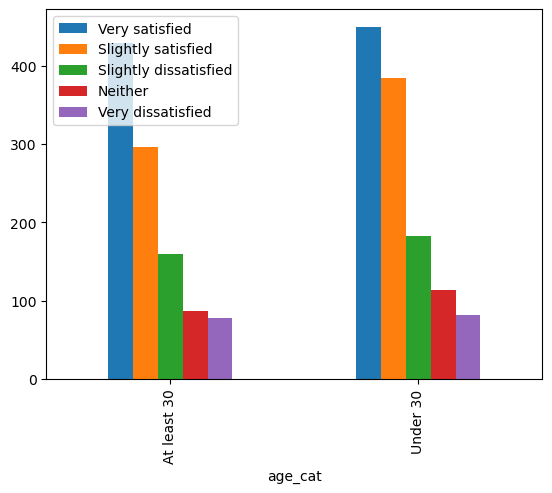

In [242]:
kk.plot(kind='bar') #kalau ada index, dia otomatis nge buat group terpisah gini di chart.

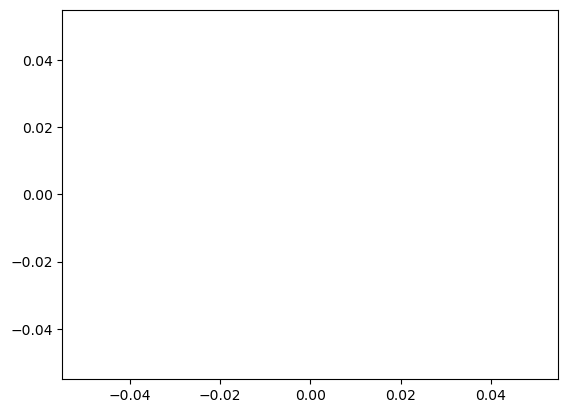

In [248]:
fig, ax = plt.subplots()
ax.plot(data=kk, kind='bar')
plt.show() 

In [256]:
kk['Very satisfied']

age_cat
At least 30    429
Under 30       450
Name: Very satisfied, dtype: int64

In [258]:
kkk

,age_cat,Very satisfied,Slightly satisfied,Slightly dissatisfied,Neither,Very dissatisfied
0,At least 30,429,296,160,87,78
1,Under 30,450,384,182,114,81


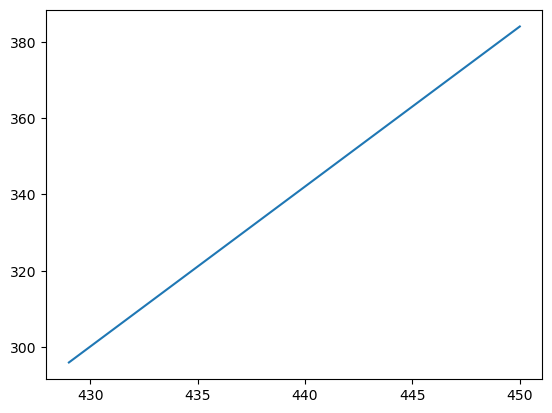

In [269]:
x=kkk['Very satisfied']
y=kkk['Slightly satisfied']
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

In [263]:
x

0    429
1    450
Name: Very satisfied, dtype: int64

In [264]:
y

0    296
1    384
Name: Slightly satisfied, dtype: int64

TypeError: plot got an unexpected keyword argument 'x'

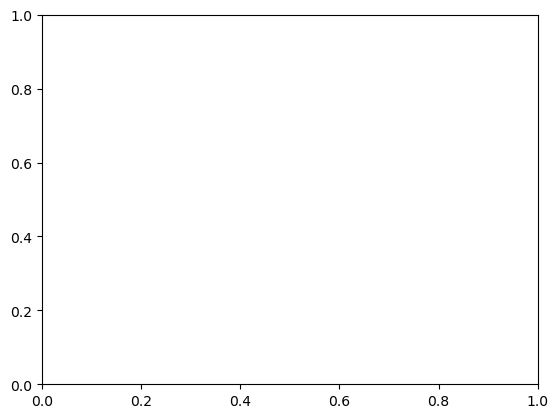

In [257]:
kkk=kk.reset_index()
fig, ax = plt.subplots()
ax.plot(x='Very satisfied', y='Slightly satisfied', data=kkk, kind='scatter')
plt.show() 

<AxesSubplot:xlabel='age_cat'>

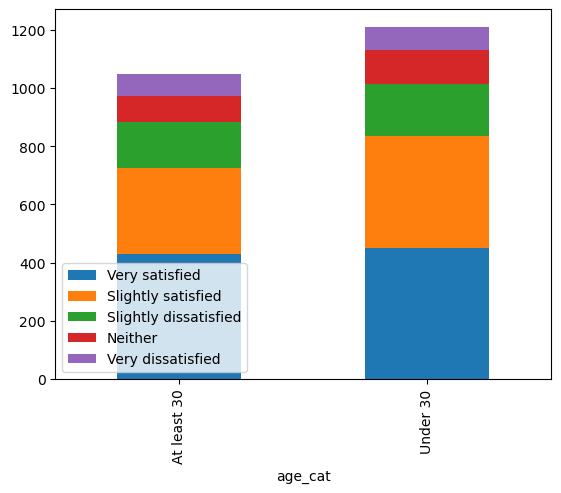

In [272]:
kk.plot(kind='bar', stacked=True)

In [275]:
stats['test']

0               pearson
1          cressie-read
2        log-likelihood
3         freeman-tukey
4    mod-log-likelihood
5                neyman
Name: test, dtype: object

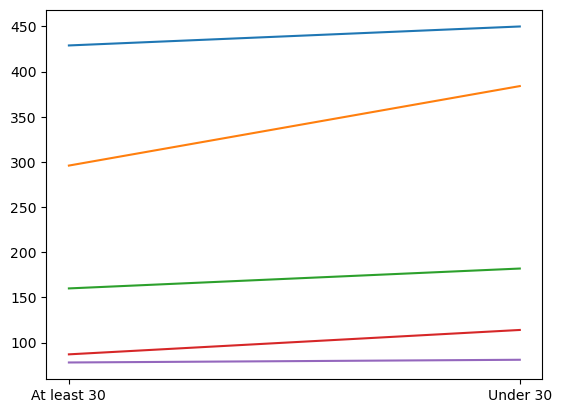

In [117]:
plt.plot(kk)

<AxesSubplot:xlabel='age_cat'>

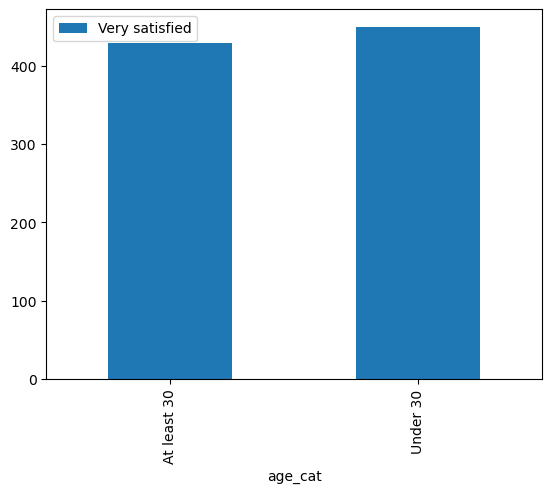

In [35]:
kk.plot(y ='Very satisfied', kind='bar', stacked=True)
#kalo plt.plot gaperlu x= y=, tapi langsung masukin value nya in order

## CHI-SQUARE GOODNESS FIT TESTS

In [37]:
stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


In [91]:
purple_link_counts=stack_overflow['purple_link'].value_counts().to_frame()
purple_link_counts
#KALAU DIKASIH TO FRAME DIA BAKAL JADI DATAFRAME, KALO GAADA TO FRAME KALO KITA CUMAN RECALL 1 KOLOM DARI
#STACKOVERFLOW DIA BAKAL OUTPUT SERIES.

,purple_link
"Hello, old friend",1225
Indifferent,405
Amused,368
Annoyed,263


In [95]:
purple_link_counts=stack_overflow['purple_link'].value_counts()
purple_link_counts

Hello, old friend    1225
Indifferent           405
Amused                368
Annoyed               263
Name: purple_link, dtype: int64

In [98]:
purple_link_counts.index

Index(['Hello, old friend', 'Indifferent', 'Amused', 'Annoyed'], dtype='object')

In [97]:
purple_link_count = purple_link_counts.rename_axis('purple_link').reset_index(name='n').sort_values('purple_link')
#name ini buat ngubah nama kolom value dari index, DENGAN CATATAN DATA KITA SERIES NOT DATAFRAME.
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
#kalau data purple link counts nya dataframe, dia jadi gabisa kita name n
purple_link_count

,purple_link,n
2,Amused,368
3,Annoyed,263
0,"Hello, old friend",1225
1,Indifferent,405


In [99]:
hypothesized = pd.DataFrame({'purple_link':['Amused', 'Annoyed', 'Hello, old friend', 'Indifferent'],'prop':[1/6,1/6,1/2,1/6]})

In [105]:
hypothesized2 = purple_link_count['purple_link']
hypothesized2

2               Amused
3              Annoyed
0    Hello, old friend
1          Indifferent
Name: purple_link, dtype: object

In [108]:
hypothesized2['prop'] = [1/6,1/6,1/2,1/6]
hypothesized2
#Karena data awalnya series, makanya pas kita maun nambah kolom, dia malah nambah index, karena itu sifat dari series.

2                                                  Amused
3                                                 Annoyed
0                                       Hello, old friend
1                                             Indifferent
prop    [0.16666666666666666, 0.16666666666666666, 0.5...
Name: purple_link, dtype: object

In [110]:
hypothesized2.index
#https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Index([2, 3, 0, 1, 'prop'], dtype='object')

In [112]:
hypothesized3 = pd.DataFrame(purple_link_count['purple_link'])
hypothesized3

,purple_link
2,Amused
3,Annoyed
0,"Hello, old friend"
1,Indifferent


In [114]:
hypothesized3['prop'] = [1/6,1/6,1/2,1/6]
hypothesized3

,purple_link,prop
2,Amused,0.166667
3,Annoyed,0.166667
0,"Hello, old friend",0.500000
1,Indifferent,0.166667


In [116]:
n_total = len(stack_overflow)
hypothesized3['n'] = hypothesized3['prop']*n_total
hypothesized3

,purple_link,prop,n
2,Amused,0.166667,376.833333
3,Annoyed,0.166667,376.833333
0,"Hello, old friend",0.500000,1130.500000
1,Indifferent,0.166667,376.833333


<BarContainer object of 4 artists>

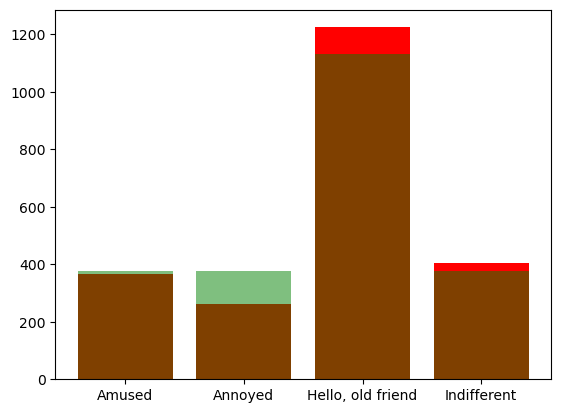

In [131]:
plt.bar(purple_link_count['purple_link'], purple_link_count['n'], color='red', label='Observed')
plt.bar(hypothesized3['purple_link'], hypothesized3['n'], color='green', label='Observed', alpha=0.5)

In [125]:
purple_link_count['n']

2     368
3     263
0    1225
1     405
Name: n, dtype: int64

In [126]:
hypothesized3['n']

2     376.833333
3     376.833333
0    1130.500000
1     376.833333
Name: n, dtype: float64

In [132]:
from scipy.stats import chisquare
chisquare(f_obs=purple_link_count['n'], f_exp=hypothesized3['n'])

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)

## WILCOXON TESTS NON-PARAMETRIC

In [138]:
repub_votes_small = pd.read_feather(r"C:\Users\alber\Documents\Online Course\Coding Notez\repub_votes_potus_08_12.feather")

In [142]:
repub_votes_small['diff'] = repub_votes_small['repub_percent_08']-repub_votes_small['repub_percent_12']
repub_votes_small

,state,county,repub_percent_08,repub_percent_12,diff
0,Alabama,Hale,38.957877,37.139882,1.817995
1,Arkansas,Nevada,56.726272,58.983452,-2.257179
2,California,Lake,38.896719,39.331367,-0.434648
3,California,Ventura,42.923190,45.250693,-2.327503
4,Colorado,Lincoln,74.522569,73.764757,0.757812
...,...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478,-4.094937
96,Wisconsin,La Crosse,37.490904,40.577038,-3.086134
97,Wisconsin,Lafayette,38.104967,41.675050,-3.570083
98,Wyoming,Weston,76.684241,83.983328,-7.299087


In [164]:
repub_votes_small['diff'].mean()

-2.8771090412429454

In [165]:
a = pingouin.ttest(x=repub_votes_small['diff'], y=0, alternative='less')
a['p-val']*2

T-test    1.914507e-07
Name: p-val, dtype: float64

In [163]:
pingouin.ttest(x=repub_votes_small['diff'], y=0, alternative='two-sided')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,two-sided,1.914507e-07,"[-3.9, -1.86]",0.560104,6.616e+04,0.999832


In [162]:
pingouin.ttest(x=repub_votes_small['diff'], y=0, alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,greater,1.0,"[-3.73, inf]",0.560104,7.558e-06,1.065329e-08


In [143]:
repub_votes_small['abs_diff']=repub_votes_small['diff'].abs()
repub_votes_small

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff
0,Alabama,Hale,38.957877,37.139882,1.817995,1.817995
1,Arkansas,Nevada,56.726272,58.983452,-2.257179,2.257179
2,California,Lake,38.896719,39.331367,-0.434648,0.434648
3,California,Ventura,42.923190,45.250693,-2.327503,2.327503
4,Colorado,Lincoln,74.522569,73.764757,0.757812,0.757812
...,...,...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478,-4.094937,4.094937
96,Wisconsin,La Crosse,37.490904,40.577038,-3.086134,3.086134
97,Wisconsin,Lafayette,38.104967,41.675050,-3.570083,3.570083
98,Wyoming,Weston,76.684241,83.983328,-7.299087,7.299087


In [145]:
from scipy.stats import rankdata
repub_votes_small['rank_abs_diff']=rankdata(repub_votes_small['abs_diff'])
repub_votes_small

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff,rank_abs_diff
0,Alabama,Hale,38.957877,37.139882,1.817995,1.817995,33.0
1,Arkansas,Nevada,56.726272,58.983452,-2.257179,2.257179,42.0
2,California,Lake,38.896719,39.331367,-0.434648,0.434648,10.0
3,California,Ventura,42.923190,45.250693,-2.327503,2.327503,44.0
4,Colorado,Lincoln,74.522569,73.764757,0.757812,0.757812,16.0
...,...,...,...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478,-4.094937,4.094937,63.0
96,Wisconsin,La Crosse,37.490904,40.577038,-3.086134,3.086134,50.0
97,Wisconsin,Lafayette,38.104967,41.675050,-3.570083,3.570083,54.0
98,Wyoming,Weston,76.684241,83.983328,-7.299087,7.299087,87.0


In [146]:
pingouin.wilcoxon(x=repub_votes_small['repub_percent_08'], y=repub_votes_small['repub_percent_12'], alternative = 'less')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,386.0,less,9.700674e-14,-0.847129,0.5729


In [147]:
pingouin.wilcoxon(x=repub_votes_small['repub_percent_08'], y=repub_votes_small['repub_percent_12'], alternative = 'greater')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,386.0,greater,1.0,-0.847129,0.4271


In [148]:
pingouin.wilcoxon(x=repub_votes_small['repub_percent_08'], y=repub_votes_small['repub_percent_12'], alternative = 'two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,386.0,two-sided,1.940135e-13,-0.847129,0.4271


In [135]:
age_vs_comp = stack_overflow[['converted_comp', 'age_first_code_cut']]
age_vs_comp_wide = age_vs_comp.pivot(columns='age_first_code_cut', values='converted_comp')
age_vs_comp_wide

age_first_code_cut,adult,child
0,77556.0,NaN
1,NaN,74970.0
2,NaN,594539.0
3,2000000.0,NaN
4,37816.0,NaN
...,...,...
2256,NaN,145000.0
2257,NaN,33972.0
2258,NaN,97284.0
2259,NaN,72000.0


In [133]:
stack_overflow

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,62812.0,I am a developer by profession,Yes,40.0,10.0,child,Yearly,145000.0,145000.0,United States,...,Too long,No,"Computer science, computer engineering, or sof...",Flask;jQuery,Angular;Angular.js;Flask;jQuery;React.js,Somewhat less welcome now than last year,50.0,30.0,20.0,At least 30
2257,62835.0,I am a developer by profession,Yes,23.0,9.0,child,Monthly,180000.0,33972.0,Russian Federation,...,Too short,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET Core;Flask,Just as welcome now as I felt last year,60.0,8.0,3.0,Under 30
2258,62837.0,I am a developer by profession,Yes,27.0,8.0,child,Monthly,7500.0,97284.0,Germany,...,Appropriate in length,No,Mathematics or statistics,None,None,Just as welcome now as I felt last year,42.0,12.0,2.0,Under 30
2259,62867.0,"I am not primarily a developer, but I write co...",Yes,33.0,13.0,child,Monthly,6000.0,72000.0,Panama,...,Too long,No,"Another engineering discipline (such as civil,...",None,Django;React.js,A lot less welcome now than last year,45.0,15.0,2.0,At least 30


In [168]:
k = pingouin.mwu(x=age_vs_comp_wide['child'], y=age_vs_comp_wide['adult'], alternative = 'greater')
k['p-val']*2

MWU    3.805447e-19
Name: p-val, dtype: float64

In [167]:
pingouin.mwu(x=age_vs_comp_wide['child'], y=age_vs_comp_wide['adult'], alternative = 'two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,two-sided,3.805447e-19,-0.222516,0.611258


In [169]:
pingouin.mwu(x=age_vs_comp_wide['child'], y=age_vs_comp_wide['adult'], alternative = 'less')

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,less,1.0,-0.222516,0.388742


In [170]:
pingouin.mwu(y=age_vs_comp_wide['child'], x=age_vs_comp_wide['adult'], alternative = 'less')

,U-val,alternative,p-val,RBC,CLES
MWU,473394.5,less,1.902723e-19,0.222516,0.611258
